In [63]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv("/content/Tweets.csv",encoding='latin1')

In [3]:
tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
tweets['Cleaned tweets'] = tweets['text'].apply(clean)
tweets.head()

,textID,text,selected_text,sentiment,Cleaned tweets
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I d have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,Sons of why couldn t they put them on the rel...


In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

tweets['POS tagged'] = tweets['Cleaned tweets'].apply(token_stop_pos)
tweets.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,textID,text,selected_text,sentiment,Cleaned tweets,POS tagged
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I d have responded if I were going,"[(responded, v), (going, v)]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego,"[(Sooo, n), (SAD, n), (miss, v), (San, n), (Di..."
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[(boss, n), (bullying, v)]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[(interview, n), (leave, v), (alone, r)]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,Sons of why couldn t they put them on the rel...,"[(Sons, n), (put, v), (releases, n), (already,..."


In [6]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
tweets['Lemma'] = tweets['POS tagged'].apply(lemmatize)
tweets.head()

,textID,text,selected_text,sentiment,Cleaned tweets,POS tagged,Lemma
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I d have responded if I were going,"[(responded, v), (going, v)]",respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego,"[(Sooo, n), (SAD, n), (miss, v), (San, n), (Di...",Sooo SAD miss San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[(boss, n), (bullying, v)]",bos bully
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[(interview, n), (leave, v), (alone, r)]",interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,Sons of why couldn t they put them on the rel...,"[(Sons, n), (put, v), (releases, n), (already,...",Sons put release already buy


In [8]:
tweets[['sentiment','text','Lemma']]

,sentiment,text,Lemma
0,neutral,"I`d have responded, if I were going",respond go
1,negative,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD miss San Diego
2,negative,my boss is bullying me...,bos bully
3,negative,what interview! leave me alone,interview leave alone
4,negative,"Sons of ****, why couldn`t they put them on t...",Sons put release already buy
...,...,...,...
27475,negative,wish we could come see u on Denver husband l...,wish could come see u Denver husband lose jo...
27476,negative,I`ve wondered about rake to. The client has ...,wonder rake client make clear NET force devs...
27477,positive,Yay good for both of you. Enjoy the break - y...,Yay good Enjoy break probably need hectic we...
27478,positive,But it was worth it ****.,worth


In [191]:
tb_counts = tweets.sentiment.value_counts()
tb_counts

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7f426f2b7750>,
 [Text(0.32493445658875425, 1.0509127456270435, 'neutral'),
  Text(-1.0209666170100276, -0.4094229682749858, 'positive'),
  Text(0.85018207902328, -1.0486612572740794, 'negative')],
 [Text(0.17723697632113866, 0.5732251339783874, '40.5%'),
  Text(-0.5568908820054694, -0.22332161905908315, '31.2%'),
  Text(0.5352998275331763, -0.6602681990244204, '28.3%')])

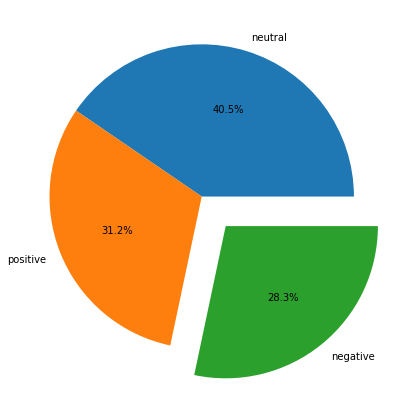

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= tweets.sentiment.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

**Analisis con Random Forest**

In [200]:
processed_features = pd.DataFrame(data.Lemma)
processed_features.head()

,Lemma
0,respond go
1,Sooo SAD miss San Diego
2,bos bully
3,interview leave alone
4,Sons put release already buy


In [201]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(data.Lemma).toarray()

In [203]:
pd.DataFrame(processed_features).head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, pd.DataFrame(x), test_size=0.25, random_state=0)

In [105]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [106]:
predictions = text_classifier.predict(X_test)

              precision    recall  f1-score   support

    negative       0.70      0.60      0.64      1917
     neutral       0.66      0.72      0.69      2801
    positive       0.74      0.75      0.75      2152

    accuracy                           0.69      6870
   macro avg       0.70      0.69      0.69      6870
weighted avg       0.70      0.69      0.69      6870

0.6941775836972344


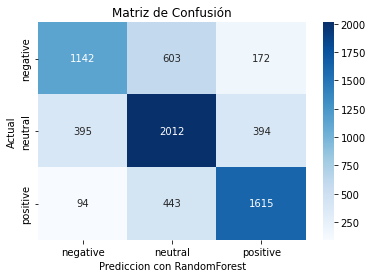

In [158]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test,predictions)
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions), index = ('negative','neutral','positive'), columns= ('negative','neutral','positive')), annot=True, cmap="Blues" ,fmt='g')
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Prediccion con RandomForest')
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [179]:
random_counts = pd.DataFrame(predictions).value_counts()
random_counts

neutral     3058
positive    2181
negative    1631
dtype: int64

([<matplotlib.patches.Wedge at 0x7f426f71e0d0>,
 [Text(0.20585539165851854, 1.18221129994816, "('neutral',)"),
  Text(-0.8739884479413712, -0.6679402614493554, "('positive',)"),
  Text(0.8079681325264563, -0.7464499292127443, "('negative',)")],
 [Text(0.12008231180080248, 0.6896232583030932, '44.5%'),
  Text(-0.47672097160438426, -0.36433105169964836, '31.7%'),
  Text(0.4407098904689761, -0.40715450684331506, '23.7%')])

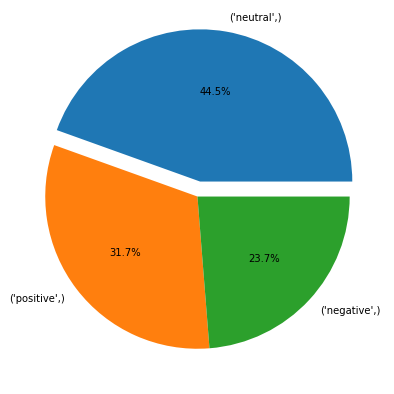

In [181]:
plt.figure(figsize=(10, 7))
plt.pie(random_counts.values, labels = random_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

**Analisis de sentimiento usando VADER**

In [182]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [183]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Vader Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)

In [185]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.2:
        return 'Positive'
    elif compound <= -0.05 :
        return 'Negative'
    else:
        return 'Neutral'
    
data['Vader Analysis'] = data['Vader Sentiment'].apply(vader_analysis)
data.head()

,sentiment,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,neutral,"I`d have responded, if I were going",respond go,0.0,Neutral,0.0000,Neutral,Neutral
1,negative,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD miss San Diego,-0.5,Negative,-0.6633,Negative,Negative
2,negative,my boss is bullying me...,bos bully,0.0,Neutral,-0.4939,Negative,Positive
3,negative,what interview! leave me alone,interview leave alone,0.0,Neutral,-0.2960,Negative,Neutral
4,negative,"Sons of ****, why couldn`t they put them on t...",Sons put release already buy,0.0,Neutral,0.0000,Neutral,Positive


In [186]:
y = data.iloc[:,6]
y = y.str.lower()
y.head()

0     neutral
1    negative
2    negative
3    negative
4     neutral
Name: Vader Analysis, dtype: object

              precision    recall  f1-score   support

    negative       0.72      0.56      0.63      7781
     neutral       0.69      0.51      0.58     11117
    positive       0.56      0.87      0.68      8582

    accuracy                           0.63     27480
   macro avg       0.66      0.64      0.63     27480
weighted avg       0.66      0.63      0.63     27480

0.6336972343522562


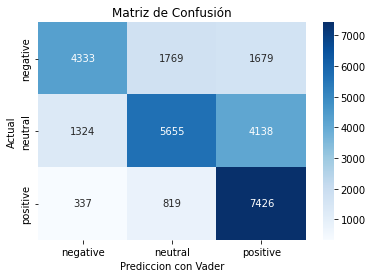

In [187]:
#Matriz de confusion
confusion_matrix(x,y)
p = sns.heatmap(pd.DataFrame(confusion_matrix(x,y), index = ('negative','neutral','positive'), columns= ('negative','neutral','positive')), annot=True, cmap="Blues" ,fmt='g')
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Prediccion con Vader')
print(classification_report(x,y))
print(accuracy_score(x, y))

In [188]:
vader_counts = data['Vader Analysis'].value_counts()
vader_counts

Positive    13243
Neutral      8243
Negative     5994
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f426f46e050>,
 [Text(0.06814543306145553, 1.1980635208338775, 'Positive'),
  Text(-0.7433963349208589, -0.8107785697872351, 'Neutral'),
  Text(0.8516861427748595, -0.6961542316220465, 'Negative')],
 [Text(0.039751502619182394, 0.6988703871530952, '48.2%'),
  Text(-0.4054889099568321, -0.4422428562475827, '30.0%'),
  Text(0.46455607787719605, -0.37972048997566166, '21.8%')])

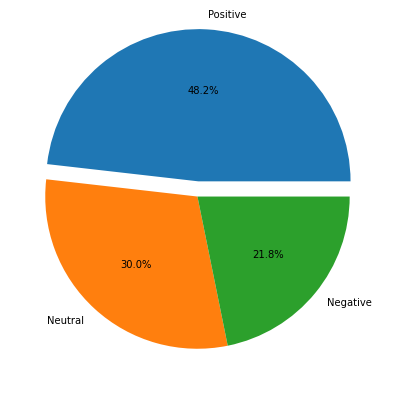

In [189]:
vader_counts= data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7f426ec5be10>,
 [Text(0.32493445658875425, 1.0509127456270435, 'neutral'),
  Text(-1.0209666170100276, -0.4094229682749858, 'positive'),
  Text(0.85018207902328, -1.0486612572740794, 'negative')],
 [Text(0.17723697632113866, 0.5732251339783874, '40.5%'),
  Text(-0.5568908820054694, -0.22332161905908315, '31.2%'),
  Text(0.5352998275331763, -0.6602681990244204, '28.3%')])

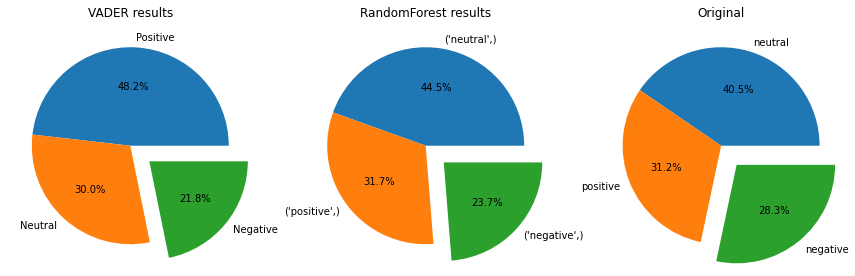

In [199]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("RandomForest results")
plt.pie(random_counts.values, labels = random_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("Original")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)